# <div dir=rtl> תרגול עשירי - The return of Feature Selection </div>

<div dir=rtl>
     בתרגול זה נכיר שיטות נוספות לבחירת פיצ'רים בהינתן דאטא סט ומודל. נשתמש במודל לבחירת הפיצ'רים.
    <br />
    בתרגול הקודם ראינו איך ניתן לבחור פיצ'רים על ידי השוואה בינם לבין עצמם או בינם ובין הלייבל (שיטות פילטר). כעת נדון על שיטות לבחירת פיצ'רים באמצעות מודל כלשהו. נאמן את המודל, נבדוק מדד טיב כלשהו לגבי המודל (אותו נרצה לאפטם) ונסיק מסקנות לגבי הפיצ'רים.
    <br />
</div>

![](https://upload.wikimedia.org/wikipedia/commons/0/04/Feature_selection_Wrapper_Method.png)

<div dir=rtl>
     בתרגול נדון בשלוש שיטות:</div>

- Forward selection
- Backward elimination
- Recursive Feature Elimination

## <div dir=rtl> שאלה  1 </div>
<div dir=rtl>
     בשנת 1988 פרסמו במשותף מספר מכוני מחקר באירופה מידע על אודות 303 חולי לב. המידע כלל נתונים שהוזנו בעת הגעה של המטופל לבית החולים לבדיקה.
    <br />
    המידע קיים בקובץ 9.heart.csv
</div>

<div dir=rtl>
     א. טענו את הקובץ לאובייקט המתים למידע טבלאי.
</div>

In [32]:
%ls

10_recitation_10.html*  10_recitation_10.ipynb* 9.heart.csv*


In [33]:
import pandas as pd

df = pd.read_csv('9.heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1


In [34]:
df.describe().loc['count', :]

age         303.0
sex         303.0
cp          303.0
trestbps    303.0
chol        303.0
fbs         303.0
restecg     303.0
thalach     303.0
exang       303.0
oldpeak     303.0
slope       303.0
ca          303.0
thal        303.0
target      303.0
Name: count, dtype: float64

<div dir=rtl>
     ב. חלקו את הדאטא לשלוש קבוצות: אחת המכילה 80 אחוז מהנתונים ועוד שתיים בגודל שווה.
</div>
<br />
<div dir=rtl>
     נשים לב שבניגוד לתרגולים קודמים, כעת מבקשים מאיתנו שלוש קבוצת. אחת גדולה ועוד שתיים קטנות. אנחנו נפרש את ההנחיה לפי המנהג התקין באימון מודלים של למידת מכונה - על קבוצה אחת נתאמן, בעזרת הקבוצה השנייה נשנה את המטה-פרמטרים של המודל ונאמן שוב כדי לשפר את התוצאות ועל קבוצה שלישית ניבחן.
    מנהג נכון הוא לדאוג להתפלגות זהה של המחלקות בכל אחת מהקבוצות. ראינו בעבר איך ניתן לבצע זאת לחלוקה לשתי קבוצות על ידי הפונקציה train_test_split והארגומנט stratify. כעת נחלק את הקבוצה הקטנה שוב.
</div>

In [35]:
from sklearn.model_selection import train_test_split

df_train, df_test_val = train_test_split(
    df,
    stratify=df['target'],
    train_size = 0.8,
    random_state=0
)

print('train df shape', df_train.shape, '\ntest+validation df shape', df_test_val.shape, '\n\n')

df_val, df_test = train_test_split(
    df_test_val,
    stratify=df_test_val['target'],
    test_size = 0.5,
    random_state=0
)

print('validation df shape', df_val.shape, '\ntest df shape', df_test.shape)


train df shape (242, 14) 
test+validation df shape (61, 14) 


validation df shape (30, 14) 
test df shape (31, 14)


<div dir=rtl>
     נשים לב שהקבוצות מדויקות עד כדי עיגול למספרים שלמים.
</div>
<br />
<div dir=rtl>
     ג. מיצאו פיצ'ר אחד כלשהו המסווג את הדאטא בצורה אופטימלית עבור מודל רגרסיה לוגיסטית.
</div>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


for feature in df_train.drop('target', axis='columns'):
    lr = LogisticRegression(max_iter = 1e3)
    
    lr.fit(df_train[feature].values.reshape(-1,1), df_train['target'])
    predictions = lr.predict(df_val[feature].values.reshape(-1,1))
    
    print(f'feature: {feature}, accuracy: {accuracy_score(df_val["target"], predictions)}')

feature: age, accuracy: 0.6
feature: sex, accuracy: 0.7
feature: cp, accuracy: 0.7666666666666667
feature: trestbps, accuracy: 0.5666666666666667
feature: chol, accuracy: 0.5333333333333333
feature: fbs, accuracy: 0.5333333333333333
feature: restecg, accuracy: 0.4666666666666667
feature: thalach, accuracy: 0.7333333333333333
feature: exang, accuracy: 0.7
feature: oldpeak, accuracy: 0.7
feature: slope, accuracy: 0.7
feature: ca, accuracy: 0.7666666666666667
feature: thal, accuracy: 0.7


<div dir=rtl>
     למעלה - עברנו על כל עמודה של הדאטא ואימנו מודל מסוג רגרסיה לוגיסטית. מהנתונים עולה מהו הפיצ'ר המבוקש:
</div>

In [37]:
selected_features = ['cp']

<div dir=rtl>
     ד. מצאו שלושה פיצ'רים נוספים עבורם הסיווג אופטימלי. ביחנו את עצמכם על קבוצת הוולידציה ועל קבוצת המבחן.
</div>
<br />
<div dir=rtl>
     מההנחיה עולה כי כעת נדרש להגיע לקבוצה בעלת ארבעה פיצ'רים כאשר אחד מהם הוא הפיצ'ר אותו בחרנו בסעיף הקודם. לשיטה זו קוראים Forward Selection (או במקומות מסוימים Sequential Forward Selection).
    <br />
    נבצע זאת על ידי מעבר על כל הפיצ'רים ובדיקת הפיצ'ר שיחד עם זה שבחרנו למעלה נותן סיווג אופטימלי. לאחר מכן נעבור שוב על כל הפיצ'רים שנבחרו ונבחר את הפיצ'ר האופטימלי עבור השלשה וכן הלאה.
    <br />
    מה החיסרון של השיטה?
</div>

In [38]:
selected_features = ['cp']

for iteration in range(3):

    accuracies = []
    
    for feature in df_train.drop(selected_features + ['target'], axis='columns'):
        
        lr = LogisticRegression(max_iter = 1e3)
        
        lr.fit(df_train[selected_features + [feature]], df_train['target'])
        predictions = lr.predict(df_val[selected_features + [feature]])
        
        accuracies.append((feature,accuracy_score(df_val["target"], predictions)))
        
    accuracies_df = pd.DataFrame(accuracies, columns=['feature', 'accuracy'])  
    selected_features.append(
        accuracies_df.iloc[accuracies_df['accuracy'].idxmax(),0]
    )
    print(f"== iteration num {iteration} ===\n fetures selected {selected_features}")

selected_features  

== iteration num 0 ===
 fetures selected ['cp', 'chol']
== iteration num 1 ===
 fetures selected ['cp', 'chol', 'oldpeak']
== iteration num 2 ===
 fetures selected ['cp', 'chol', 'oldpeak', 'age']


['cp', 'chol', 'oldpeak', 'age']

<div dir=rtl>
     מצאנו סט של ארבעה פיצ'רים כמבוקש. ניבחן על קבוצת הוולידציה ועל קבוצת המבחן:
</div>

In [39]:
lr = LogisticRegression(max_iter = 1e3)
lr.fit(df_train[selected_features], df_train['target'])

predictions = lr.predict(df_val[selected_features])
accuracy_score(df_val["target"], predictions)

0.8666666666666667

In [40]:
predictions = lr.predict(df_test[selected_features])
accuracy_score(df_test["target"], predictions)

0.7741935483870968

<div dir=rtl>
     ה. מה איכות הסיווג של מסווג לינארי עם כלל הפיצ'רים? מצאו אילו פיצ'רים כדאי להוריד כך שתישארו עם ארבעה פיצ'רים. ביחנו את עצמכם הן על קבוצת הוולידציה והן על קבוצת המבחן.
</div>

<br />
<div dir=rtl>
     כעת נמצא את איכות הסיווג תוך שימוש בכלל הפיצ'רים. עבור סעיף זה בחרתי להשתמש במימוש של statsmodels ומיד נבין למה.
</div>

In [41]:
import statsmodels.api as sm

lr = sm.Logit(df_train['target'], sm.add_constant(df_train.drop('target', axis='columns')))

results = lr.fit()

predictions = results.predict(sm.add_constant(df_val.drop('target', axis='columns')))>=0.5
accuracy_score(df_val["target"], predictions)

Optimization terminated successfully.
         Current function value: 0.347078
         Iterations 7


0.8666666666666667

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           13
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.4963
Time:                        23:05:28   Log-Likelihood:                -83.993
converged:                       True   LL-Null:                       -166.74
Covariance Type:            nonrobust   LLR p-value:                 1.518e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5270      3.012      1.503      0.133      -1.377      10.431
age           -0.0069      0.027     -0.255      0.799      -0.060       0.046
sex           -1.4691      0.523     -2.807      0.005      -2.495      -0.443
cp             0.9343      0.213      4.379      0.000       0.516       1.352
trestbps      -0.0217      0.012     -1.880      0.060      -0.044       0.001
chol          -0.0032      0.004     -0.742      0.458      -0.012       0.005
fbs            0.2254      0.579      0.389      0.697      -0.910       1.361
restecg        0.7787      0.404      1.925      0.054      -0.014       1.571
thalach        0.0167      0.012      1.450      0.147      -0.006       0.039
exang         -1.4455      0.468     -3.091      0.002      -2.362      -0.529
oldpeak       -0.6387      0.241     -2.651      0.008      -1.111      -0.167
slope          0.4844      0.397      1.219      0.223      -0.295       1.263
ca            -0.7140      0.207     -3.441      0.001      -1.121      -0.307
thal          -0.9965      0.327     -3.052      0.002      -1.637      -0.356
==============================================================================
"""

<div dir=rtl>
     מעל - הדיוק כפי שנמצא עבור כלל הפיצ'רים וטבלה המרכזת את הנתונים הסטטיסטיים בהתאמה של הפונקציה. נשים לב שלכל פיצ'ר הפונקציה מצאה גם את הPV שלו. אמנם ניתן להמשיך להשתמש בדיוק, אבל בסעיף זה אני בוחר להשתמש בPV על מנת למיין פיצ'רים.
    <br />
    בסעיף זה ביקשו מאיתנו להתחיל עם כלל הפיצ'רים ולהוריד אחד-אחד עד שנישאר עם סט של ארבעה - שיטה שנקראת Backward elimination (ובמקומות מסוימים Sequential Backward Selection). 
    <br />
    בשיטה זו נוריד כל פעם את הפיצ'ר עם הPV הכי גבוה ונאמן. נמצא שוב את הפיצ'ר עם ה PV הכי גבוה ונוריד אותו וחוזר חלילה.
    <br />
    למטה הקוד הרלוונטי עטוף בפונקציה על מנת להדגים נקודה כלשהי בהמשך.
</div>

In [43]:
def backward_elimination(n, df_train):
    selected_features = df_train.drop('target',axis='columns').columns.to_list()

    while len(selected_features) > n:
        lr = sm.Logit(df_train['target'], sm.add_constant(df_train[selected_features]))
        results = lr.fit(disp=0)

        worst_pvalue_feature = results.pvalues.sort_values(ascending=False).index[0]

        if worst_pvalue_feature == 'const':
            worst_pvalue_feature = results.pvalues.sort_values(ascending=False).index[1]


        selected_features.remove(worst_pvalue_feature)
    return selected_features

In [44]:
selected_features = backward_elimination(4, df_train)
selected_features

['cp', 'exang', 'oldpeak', 'ca']

In [45]:
lr = sm.Logit(df_train['target'], sm.add_constant(df_train[selected_features]))

results = lr.fit()

predictions = results.predict(sm.add_constant(df_val[selected_features]))>=0.5
accuracy_score(df_val["target"], predictions)

Optimization terminated successfully.
         Current function value: 0.416771
         Iterations 7


0.7666666666666667

In [46]:
predictions = results.predict(sm.add_constant(df_test[selected_features]))>=0.5
accuracy_score(df_test["target"], predictions)

0.8387096774193549

<div dir=rtl>
     למעשה, ניתן לראות מה יתרחש עבור כל בחירה של מספר פיצ'רים כלשהו. על מנת לעשות זאת נבחר כל פעם מספר בין 1 ל13 (מספר העמודות בדאטא), נמצא את הפיצ'רים על ידי הפונקציה שכתבנו, נאמן על קבוצת האימון ונבדוק את התוצאות על קבוצת הוולידציה.
</div>

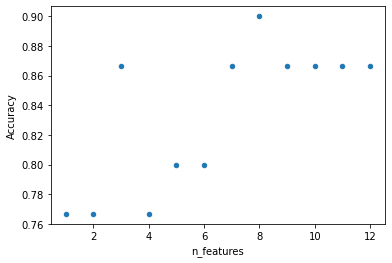

In [47]:
resultsDF = []

for n in range(1,len(df_train.drop('target',axis='columns').columns.to_list())):
    selected_features = backward_elimination(n, df_train)

    lr = sm.Logit(df_train['target'], sm.add_constant(df_train[selected_features]))
    results = lr.fit(disp=0)

    predictions = results.predict(sm.add_constant(df_val[selected_features]))>=0.5
    
    resultsDF.append(pd.DataFrame(
        {'n_features': n, 'Accuracy': accuracy_score(df_val["target"], predictions)},index=[0]))
resultsDF = pd.concat(resultsDF)
p = resultsDF.plot.scatter(x='n_features', y='Accuracy')

<div dir=rtl>
    נשים לב ששתי השיטות האלה ממומשות בsklearn תחת <code>SequentialFeatureSelector</code> יחד עם קרוס ואלידציה <br />ֿ
    הנה הצצה לאיך ניתן להשתמש בהן:
</div>

In [48]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LogisticRegression(max_iter = 1e3), n_features_to_select=4)
sfs.fit(df_train.drop('target', axis='columns'), df_train['target'])

print("forward", df_train.drop('target', axis='columns').columns[sfs.get_support()])

sfs = SequentialFeatureSelector(LogisticRegression(max_iter = 1e3), n_features_to_select=4, direction='backward')
sfs.fit(df_train.drop('target', axis='columns'), df_train['target'])

print("backward", df_train.drop('target', axis='columns').columns[sfs.get_support()])


forward Index(['cp', 'thalach', 'ca', 'thal'], dtype='object')
backward Index(['cp', 'oldpeak', 'ca', 'thal'], dtype='object')


<div dir=rtl>
    באופן כללי שני הכיוונים לרוב לא יחזירו את אותה התוצאה. <br />
    נשים לב שגם לא קיבלנו את אותה התשובה כמו המימוש שלנו בשני המקרים. אחת הסיבות היא שלא השתמשנו בקורס ולידציה בבחירת הפיצ׳ר הראשוני וכמו כן גם בבחירת הפיצ׳רים הבאים. סיבה נוספת היא שהשתמשנו בתהליך הbackward בPV בשביל אלימינציה בעוד שבמימוש של sklearn אנחנו משתמשים במדד הaccuracy.
</div>

<div dir=rtl>
     לשתי השיטות שראינו עד כה יש מספר חסרונות. נמנה שתיים מהן. הראשונה היא שבחירה כזו של פיצ'רים לא לוקחת בחשבון את כל הצירופים האפשריים - בכל שלב בוחרים פיצ'ר אחד ומוסיפים אותו לקבוצה, אבל לא לוקחים בחשבון צירוף של אותו פיצ'ר עם קבוצות אחרות. החיסרון השני הוא שבתהליך אנחנו מאמנים הרבה מודלים לכן השיטות מותאמות למודלים פשוטים ולמעט דאטא.
</div>
<br />
<div dir=rtl>
     ו. מצאו אילו פיצ'רים כדאי להוריד כך שנישאר עם סט אופטימלי. ביחנו את עצמכם הן על קבוצת הוולידציה והן על קבוצת המבחן.
</div>
<br />
<div dir=rtl>
     ניתן להתמודד עם החיסרון הראשון והוא על ידי שימוש בפונקציה רקורסיבית. פונקציה רקורסיבית עוברת על כל הקבוצות האפשריות של פיצ'רים ובוחרת מתוכם את זו הנותנת את הביצועים האופטימליים. נשים לב שבכך שפתרנו את הבעיה הראשונה - החמרנו את השנייה.
    <br />
    אמנם ניתן לממש זאת בעצמינו, במקרה זה מומלץ מאוד להשתמש במימוש מוכן. זאת משום שאנחנו נשתמש בפונקציה על מעט לאמן מספר גדול של מודלים, וללא מימוש אופטימלי זמן הריצה יהיה בלתי סביר. הפונקציה RFECV של Scikir-Learn מבצעת את הפעולה עבורינו:
    <br /> Recursive Feature Elimination with Cross Validation.
</div>

In [49]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1e3)
rfe = RFECV(model, min_features_to_select=1)

train_val = pd.concat([df_train, df_val])

rfe.fit(train_val.drop('target',axis='columns'), train_val['target'])
selected_columns = train_val.drop('target',axis='columns').columns[
    rfe.support_
]

selected_columns

/Users/daniellemiller/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [50]:
model.fit(train_val[selected_columns], train_val['target'])

LogisticRegression(max_iter=1000.0)

In [51]:
predictions = model.predict(df_test[selected_columns])
accuracy_score(df_test["target"], predictions)

0.8709677419354839

Text(0, 0.5, 'Cross validation score (accuracy)')

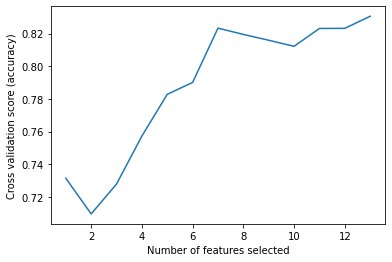

In [52]:
import matplotlib.pyplot as plt
plt.plot(
    range(1, len(rfe.grid_scores_) + 1),
    rfe.grid_scores_,
)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")


<div dir=rtl>
     ואכן קיבלנו סט של פיצ'רים עם דיוק מסוים בקבוצת וולידציה כלשהי (חיצונית לתהליך הקרוס-וולידציה).
    <br /><br />
    כעת מבין כל השיטות שלהלן נשאר לבחור סט כלשהו של פיצ'רים. איך? דבר אחד שלא עושים הוא לבחור סט פיצ'רים על בסיס הביצועים בקבוצת המבחן. קבוצת המבחן משמשת מדד לביצועים בעולם האמיתי. בעולם של למידת מכונה - המכונה לומדת מקבוצת האימון והאלגוריתמאי לומד מקבוצת הוולידציה אילו מטה-פרמטרים לבחור. האלגוריתם לאחר מכן יוצא לעולם ונבחן. בחירת סט של פיצ'רים על בסיס קבוצת המבחן משמעה אוברפיט - משמעה שהמטה פרמטרים של המודל נבחרו תוך שימוש בקבוצת המבחן ונעשתה למידה (של הגורם האנושי) באותה קבוצה.
</div>